# SpotiPy 
## Top 100 streamed songs on Spotify from 2010 to 2019
### What music metrics set these songs apart from the rest.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests
import json
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 


In [2]:
# Load the CSV file from Kaggle into Pandas DataFrame
top_songs = pd.read_csv("Resources/10years_top10s.csv")

top_songs.head(5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Step 1: Filter the above dataframe for years 2010 - 2012

In [3]:
top_songs = pd.read_csv("Resources/10years_top10s.csv")

# Clean grouped_data removing any columns that are too out of range to be useful.
top_songs.drop(['live', 'val', 'acous'], axis=1)

# Rename columns.  
top_songs = top_songs.rename(columns={'title': 'Title', 'artist': 'Artist', 'top genre': 'Genre', 'year': 'Year', 'bpm': 'BPM', 'nrgy': 'Energy', 'dnce': 'Dance', 'dB': 'Decibels (dB)', 'live': 'Live', 'val': 'Valence', 'dur': 'Duration', 'acous': 'Acousticness', 'spch': 'Speechiness', 'pop': 'Popularity'})

# Display the first 5 rows of the grouped dataframe
top_songs.head()


,Unnamed: 0,Title,Artist,Genre,Year,BPM,Energy,Dance,Decibels (dB),Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
# Filter the data for the years 2010, 2011, and 2012
three_year_data = top_songs[top_songs['Year'].isin([2010, 2011, 2012])]

## Step 2: Create a bar graph for the top genres for each of the years from the filtered data.  Also, create and plot linear regression for each of the music metric columns.

### Bar Graph for Top Genres in 2010-2012:

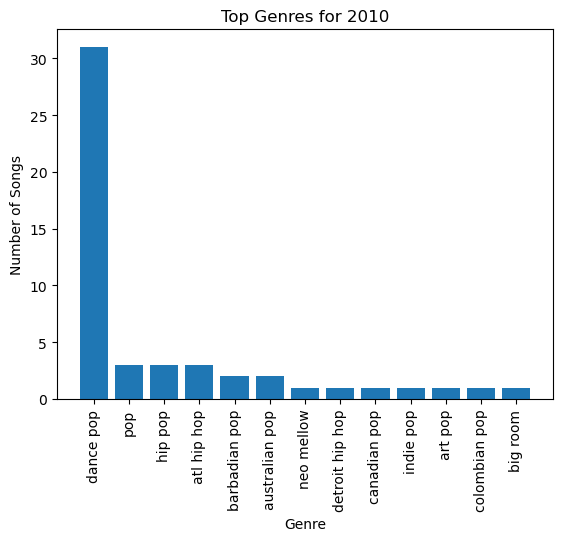

In [5]:
# Filter the data for year 2010
top_genres_2010 = three_year_data[three_year_data['Year'] == 2010]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2010['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2010')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=90)

plt.show()

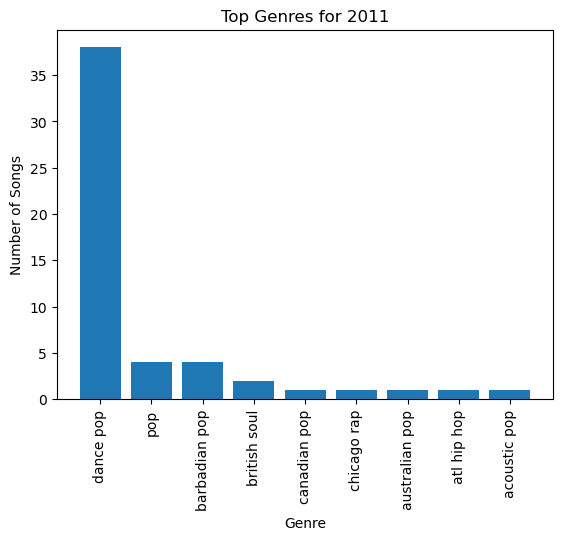

In [6]:
# Filter the data for year 2011
top_genres_2011 = three_year_data[three_year_data['Year'] == 2011]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2011['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2011')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=90)
plt.show()

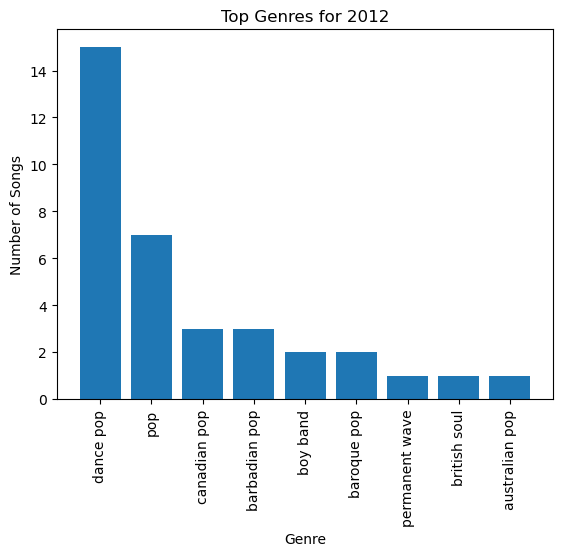

In [7]:
# Filter the data for year 2012
top_genres_2012 = three_year_data[three_year_data['Year'] == 2012]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2012['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2012')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=90)
plt.show()

## Analyzing music metrics for 2010 - 2012: 
### BPM metric for top genre. 

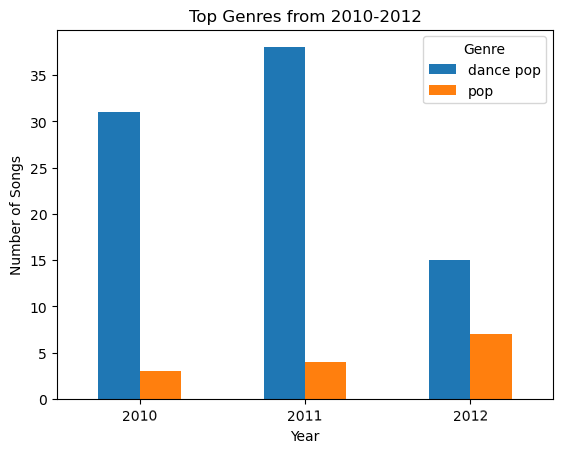

In [15]:
# Filter data for the top genres 'dance pop' and 'pop' for years 2010, 2011, and 2012
filtered_data = three_year_data[(three_year_data['Genre'].isin(['dance pop', 'pop'])) & (three_year_data['Year'].isin([2010, 2011, 2012]))]

# Group data by year and genre, and calculate the count
grouped_data = filtered_data.groupby(['Year', 'Genre']).size().unstack()

# Create bar plot
grouped_data.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Top Genres from 2010-2012')
plt.xticks(rotation=True)
# Set legend
plt.legend(title='Genre')

# Show plot
plt.show()






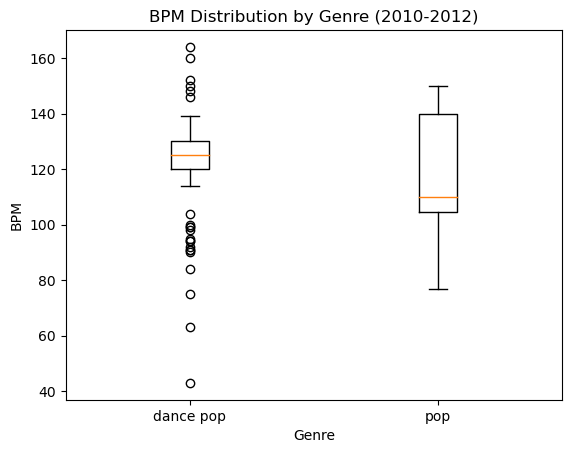

In [16]:
# Filter data for the top genres 'dance pop' and 'pop' for years 2010, 2011, and 2012
filtered_data = three_year_data[(three_year_data['Genre'].isin(['dance pop', 'pop'])) & (three_year_data['Year'].isin([2010, 2011, 2012]))]

# Create a box plot
plt.boxplot([filtered_data[filtered_data['Genre'] == 'dance pop']['BPM'],
             filtered_data[filtered_data['Genre'] == 'pop']['BPM']],
            labels=['dance pop', 'pop'])

# Set axis labels and title
plt.xlabel('Genre')
plt.ylabel('BPM')
plt.title('BPM Distribution by Genre (2010-2012)')

# Show plot
plt.show()



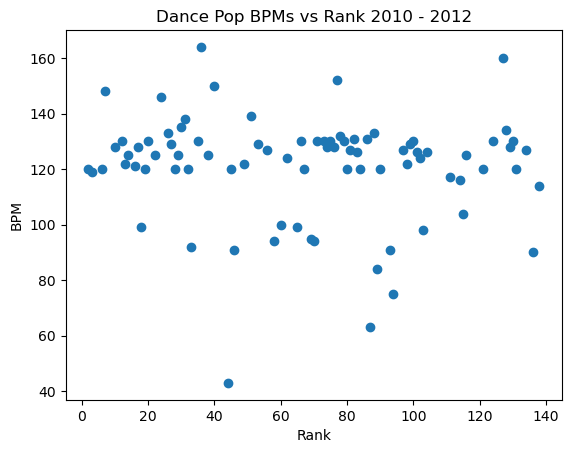

In [19]:
# Filter data for 'dance pop' genre
dance_pop = three_year_data[three_year_data['Genre'] == 'dance pop']

# Create scatter plot
plt.scatter(x=dance_pop.index, y=dance_pop['BPM'])

# Set axis labels and title
plt.xlabel('Rank')
plt.ylabel('BPM')
plt.title('Dance Pop BPMs vs Rank 2010 - 2012')

# Show plot
plt.show()


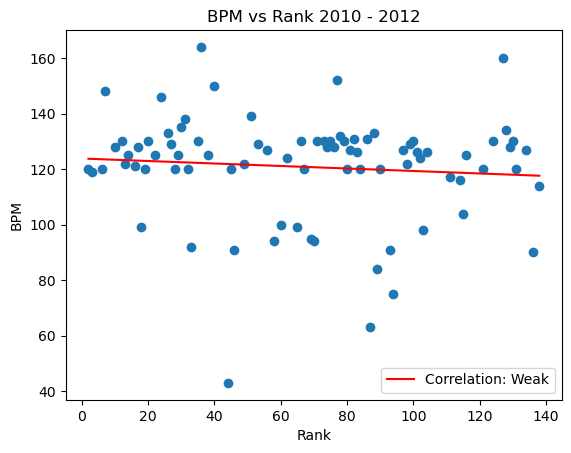

In [18]:
# Subset the data for the dance pop genre
dance_pop = three_year_data[three_year_data['Genre'] == 'dance pop']

# Create a scatter plot of BPM vs Rank
plt.scatter(x=dance_pop.index, y=dance_pop['BPM'])

# Add axis labels and title
plt.xlabel('Rank')
plt.ylabel('BPM')
plt.title('BPM vs Rank 2010 - 2012')

# Add a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(dance_pop.index, dance_pop['BPM'])
plt.plot(dance_pop.index, intercept + slope*dance_pop.index, color='red', label='Correlation: Strong' if abs(r_value) >= 0.7 else 'Correlation: Weak')

# Add a legend
plt.legend()

# Display the plot
plt.show()


## Linear Regression models of music metrics for 2010.

In [20]:
three_year_data.head(5)

,Unnamed: 0,Title,Artist,Genre,Year,BPM,Energy,Dance,Decibels (dB),Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
# Create scatter plot
plt.scatter(x=top_songs_2010.index, y=top_songs_2010['BPM'])

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(top_songs_2010.index, top_songs_2010['BPM'])
plt.plot(top_songs_2010.index, intercept + slope*top_songs_2010.index, color='red')

# Set axis labels and title
plt.xlabel('Rank')
plt.ylabel('BPM')
plt.title('BPM vs Rank (Year 2010)')

# Add legend indicating correlation strength
if abs(r_value) > 0.7:
    correlation_strength = 'Strong'
else:
    correlation_strength = 'Weak'
legend_text = f'Correlation strength: {correlation_strength}'
plt.legend([legend_text])

# Show plot
plt.show()

In [ ]:
# Create scatter plot
plt.scatter(x=top_songs_2010.index, y=top_songs_2010['Energy'])

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(top_songs_2010.index, top_songs_2010['Energy'])
plt.plot(top_songs_2010.index, intercept + slope*top_songs_2010.index, color='red')

# Set axis labels and title
plt.xlabel('Rank')
plt.ylabel('Energy')
plt.title('Energy vs Rank (Year 2010)')

# Add legend indicating correlation strength
if abs(r_value) > 0.7:
    correlation_strength = 'Strong'
else:
    correlation_strength = 'Weak'
legend_text = f'Correlation strength: {correlation_strength}'
plt.legend([legend_text])

# Show plot
plt.show()

In [ ]:
# Show a bar graph for the top genres of 2011.
# Filter the data for year 2010
top_songs_2011 = top_songs[top_songs['year'] == 2011]

# Get the value counts for the 'top genre' column
genre_counts = top_songs_2011['top genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2011')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()
